## Customer Segmentation : Customer Shopping Latest Trends Dataset
- __Name__: Fariz Erawan
- __Email__: farizerawan476@gmail.com

### 1. About this Project Dataset

#### Dataset Information

The dataset offers a comprehensive view of consumer shopping trends, aiming to uncover patterns and behaviors in retail purchasing. It contains detailed transactional data across various product categories, customer demographics, and purchase channels. Key features may include:

- Transaction Details: Purchase date, transaction value, product category, and payment method.
- Customer Information: Age group, gender, location, and loyalty status.
- Shopping Behavior: Frequency of purchases, average spend per transaction, and seasonal trends.

#### Attribute Information

Total Rows: 3,900

Total Columns: 19

Column Names:

- Customer ID
- Age
- Gender
- Item Purchased
- Category
- Purchase Amount (USD)
- Location
- Size
- Color
- Season
- Review Rating
- Subscription Status
- Payment Method
- Shipping Type
- Discount Applied
- Promo Code Used
- Previous Purchases
- Preferred Payment Method
- Frequency of Purchases

### 2. Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

### 3. Data Wrangling

#### Gathering Data

In [2]:
shop_df = pd.read_csv('shopping_trends_unlabeled.csv')
shop_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
shop_df.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3124,3125,57,Female,Jewelry,Accessories,51,California,M,Peach,Summer,3.4,No,Venmo,Standard,No,No,4,Cash,Every 3 Months
3711,3712,69,Female,Hat,Accessories,62,Texas,XL,Peach,Fall,3.2,No,Cash,Free Shipping,No,No,33,Cash,Annually
2750,2751,51,Female,Sandals,Footwear,66,Alaska,L,Pink,Spring,2.7,No,Cash,2-Day Shipping,No,No,26,PayPal,Every 3 Months
3131,3132,34,Female,Jacket,Outerwear,59,North Dakota,M,Peach,Fall,2.9,No,Cash,Store Pickup,No,No,11,Bank Transfer,Every 3 Months
1194,1195,50,Male,Hoodie,Clothing,46,New York,S,Teal,Winter,3.1,No,Debit Card,2-Day Shipping,Yes,Yes,6,Credit Card,Fortnightly
1153,1154,27,Male,Shirt,Clothing,41,Idaho,M,Pink,Summer,4.0,No,PayPal,Free Shipping,Yes,Yes,6,Bank Transfer,Quarterly
2740,2741,19,Female,Sunglasses,Accessories,70,Pennsylvania,M,Lavender,Summer,4.9,No,Credit Card,Free Shipping,No,No,34,Bank Transfer,Fortnightly
3465,3466,19,Female,Backpack,Accessories,53,Iowa,M,Gold,Spring,3.4,No,Bank Transfer,Standard,No,No,31,Debit Card,Weekly
338,339,69,Male,Hoodie,Clothing,79,Massachusetts,M,Silver,Winter,3.5,Yes,Venmo,Express,Yes,Yes,16,Cash,Weekly
674,675,48,Male,Jewelry,Accessories,33,Washington,XL,Beige,Winter,4.7,Yes,Venmo,Store Pickup,Yes,Yes,36,Bank Transfer,Annually


In [4]:
shop_df.shape

(3900, 19)

##### Insight:
The dataset consists of 3900 observations across 19 columns.

#### Data Cleaning and Transformation

In [5]:
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
shop_df.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

##### Missing Value

In [7]:
shop_df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

##### Outlier

In [8]:
numeric_features = shop_df.select_dtypes(include=['number']).columns

Detecting Outliers using Box Plot with IQR Method

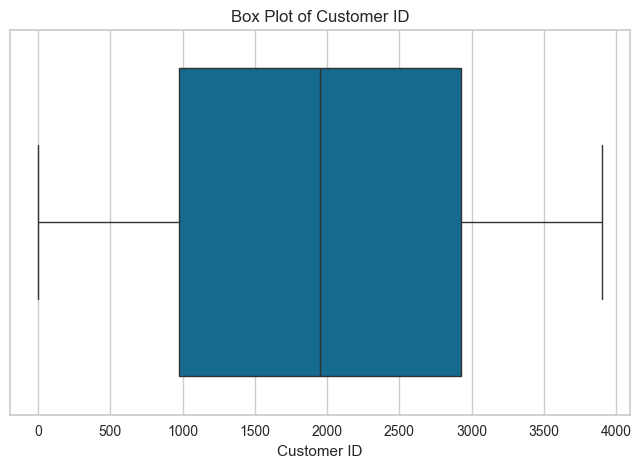

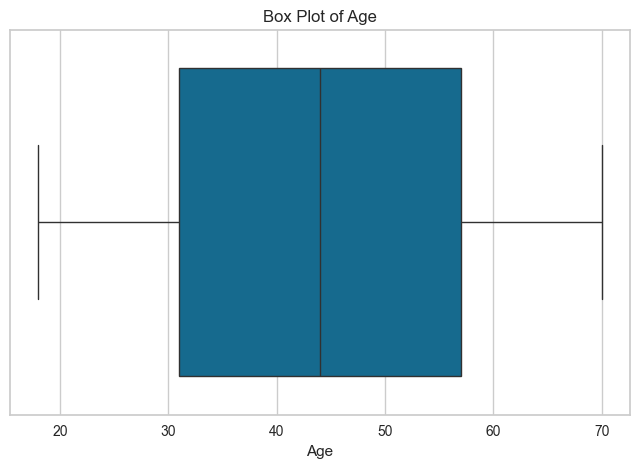

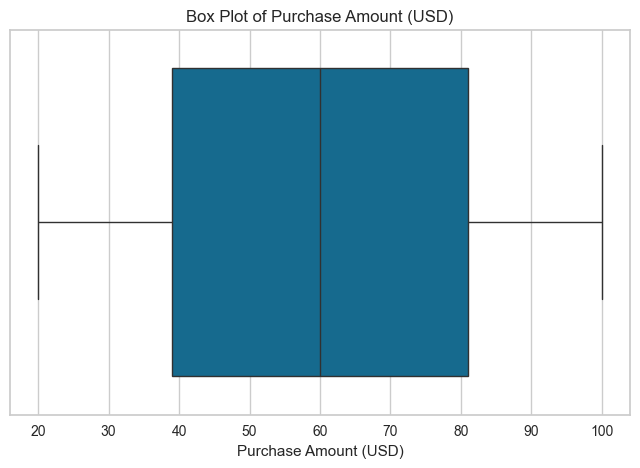

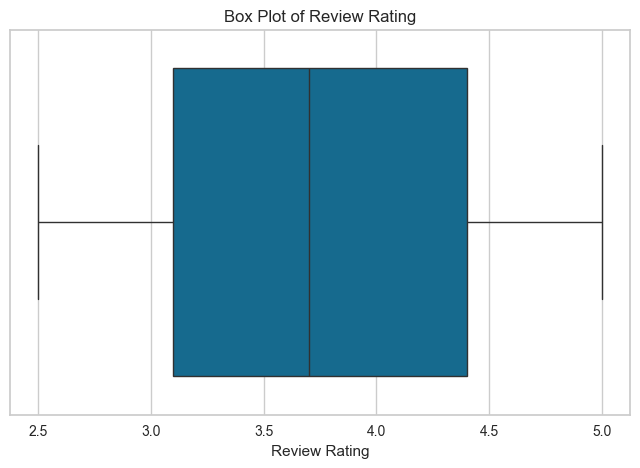

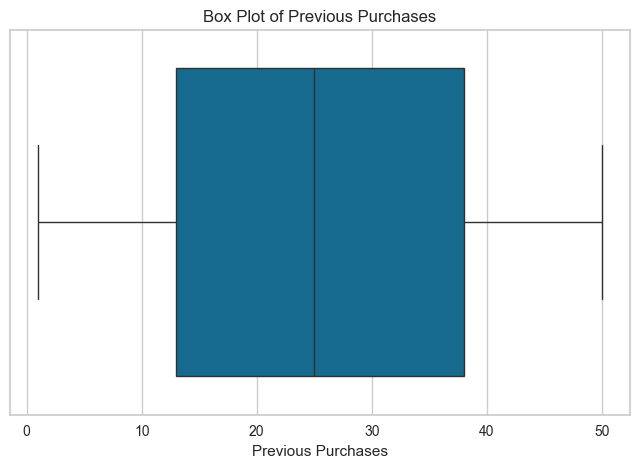

In [9]:
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=shop_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [10]:
def detect_outliers_iqr(shop_df, column):
    Q1 = shop_df[column].quantile(0.25)
    Q3 = shop_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_data = shop_df[(shop_df[column] < lower_bound) | (shop_df[column] > upper_bound)]
    return outliers_data

In [11]:
for features in numeric_features:
    ouliers_data = detect_outliers_iqr(shop_df, features)
    print(f'Column: {features}')
    print(f'Outlier count: {len(ouliers_data)}')
    print('-' * 30)

Column: Customer ID
Outlier count: 0
------------------------------
Column: Age
Outlier count: 0
------------------------------
Column: Purchase Amount (USD)
Outlier count: 0
------------------------------
Column: Review Rating
Outlier count: 0
------------------------------
Column: Previous Purchases
Outlier count: 0
------------------------------


##### Duplicate Value

In [12]:
duplicates = shop_df.duplicated()

print('Duplicate Row:')
print(shop_df[duplicates])

Duplicate Row:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
Index: []


##### Rename Column

In [13]:
shop_df.columns = ['customer_id', 'age', 'gender', 'item_purchase', 'category', 'purchase_amount', 'location', 'size', 'color', 'season', 'review_rating', 'subscription', 'payment_method', 'shipping_type', 'discount_apply', 'promo_use', 'previous_purchase', 'preffered_payment', 'freq_purchase']
shop_df.head()

,customer_id,age,gender,item_purchase,category,purchase_amount,location,size,color,season,review_rating,subscription,payment_method,shipping_type,discount_apply,promo_use,previous_purchase,preffered_payment,freq_purchase
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


##### Insight:
- Most column are categorical, while five are numerical: `customer_id`, `age`, `purchase_amount `, `review_rating`, `previous_purchase`     
- There is no missing data on `shop_df`
- No outliers found after checking the numerical column using boxplot and IQR method
- No duplication records were detected
- Rename a column in `shop_df`

### 4. Exploratory Data Analysis (EDA)

##### Feature Engineering

In [14]:
shop_df.describe(include='all')

,customer_id,age,gender,item_purchase,category,purchase_amount,location,size,color,season,review_rating,subscription,payment_method,shipping_type,discount_apply,promo_use,previous_purchase,preffered_payment,freq_purchase
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [15]:
categorical_features = shop_df.select_dtypes(include=['object']).columns
for column in categorical_features:
    value_counts = shop_df[column].value_counts()
    print(value_counts)
    print("\n")

gender
Male      2652
Female    1248
Name: count, dtype: int64


item_purchase
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
We

In [16]:
# Standardize 'location'
shop_df['location'] = shop_df['location'].replace(['Maine', 'Vermont', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'], 'Northeast')
shop_df['location'] = shop_df['location'].replace(['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Mississippi', 'Kentucky', 'Tennessee'], 'Southeast')
shop_df['location'] = shop_df['location'].replace(['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'], 'Midwest')
shop_df['location'] = shop_df['location'].replace(['Texas', 'Oklahoma', 'Arkansas', 'Louisiana'], 'Southwest')
shop_df['location'] = shop_df['location'].replace(['Colorado','New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii', 'Wyoming', 'Montana', 'Idaho'], 'West')

print('Unique values in location:')
print(shop_df['location'].unique())

Unique values in location:
['Southeast' 'Northeast' 'West' 'Southwest' 'Midwest']


In [17]:
customer = shop_df.copy()
# customer_id	age	gender	item_purchase	category	purchase_amount	location	size	color	season	review_rating	subscription	payment_method	shipping_type	discount_apply	promo_use	previous_purchase	preffered_payment	freq_purchase
shop_df = shop_df[['age', 'gender', 'category', 'purchase_amount', 'location', 'size', 'season', 'review_rating', 'subscription', 'payment_method', 'shipping_type', 'discount_apply', 'previous_purchase', 'preffered_payment', 'freq_purchase']]

In [18]:
# Categorize columns into three groups based on their data type

binary_column = [col for col in shop_df.columns if shop_df[col].nunique() == 2]
categorical_column = [col for col in shop_df.columns if 2 < shop_df[col].nunique() < 10]
numerical_column = [col for col in shop_df.select_dtypes(include=['number']).columns 
if col not in binary_column + categorical_column]

In [19]:
shop_df.head()

,age,gender,category,purchase_amount,location,size,season,review_rating,subscription,payment_method,shipping_type,discount_apply,previous_purchase,preffered_payment,freq_purchase
0,55,Male,Clothing,53,Southeast,L,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly
1,19,Male,Clothing,64,Northeast,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly
2,50,Male,Clothing,73,Northeast,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly
3,21,Male,Footwear,90,Northeast,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly
4,45,Male,Clothing,49,West,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually


##### Visualization

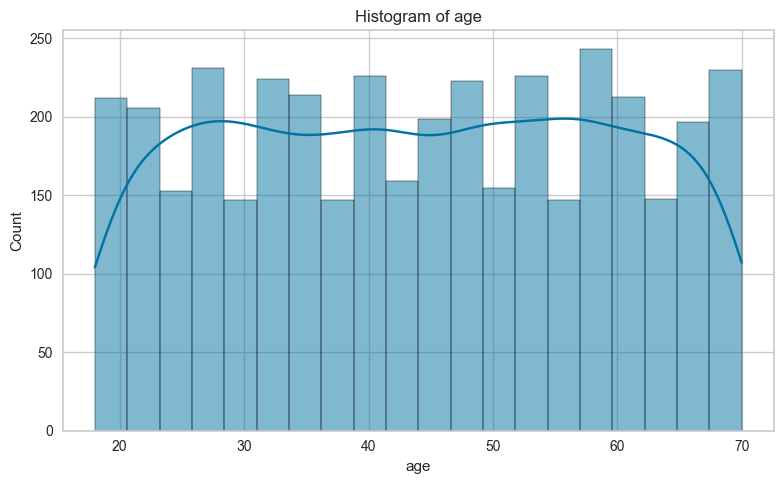

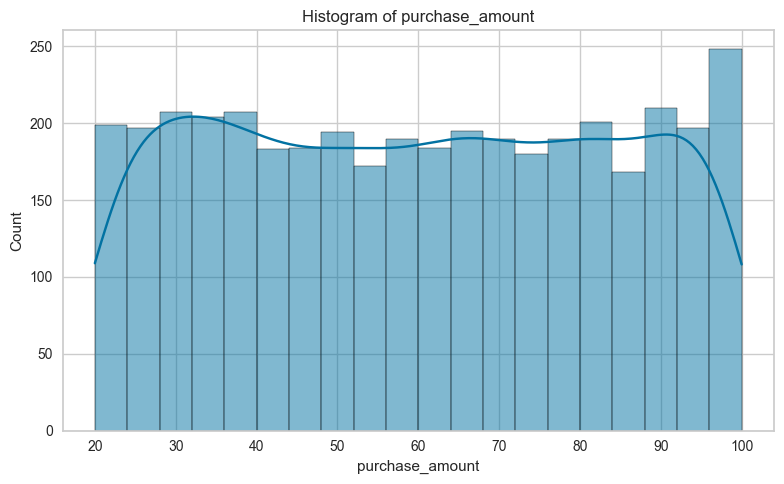

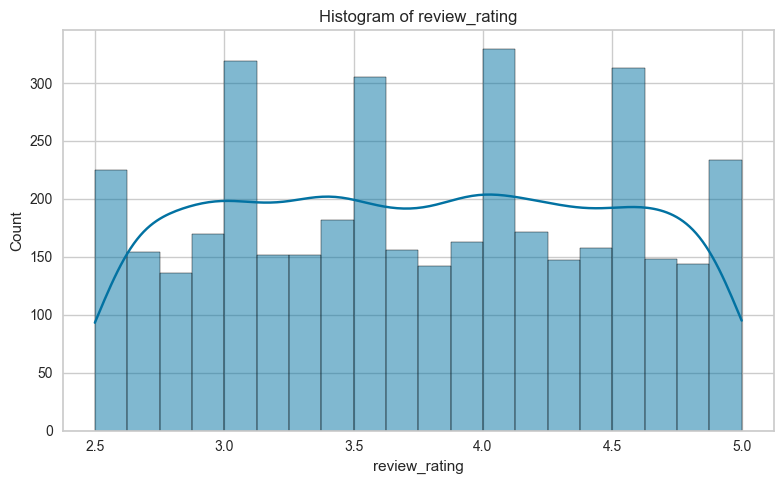

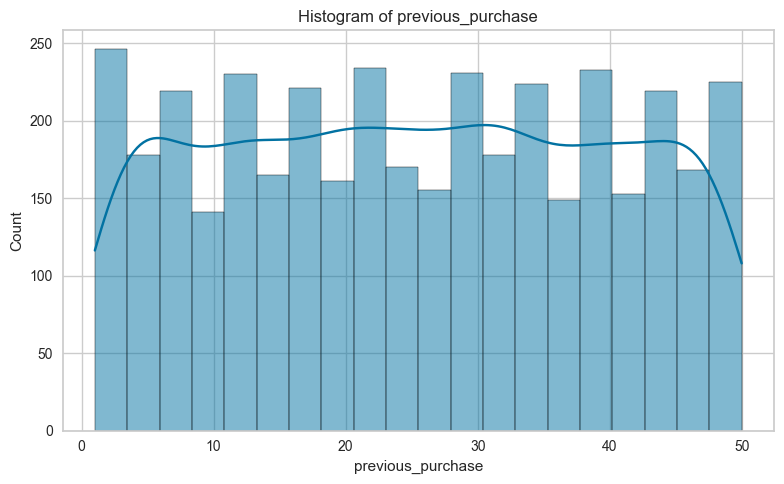

In [20]:
# Plot histograms for each numerical column
for column in numerical_column:
   
    plt.figure(figsize=(8, 5))
    sns.histplot(x=shop_df[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

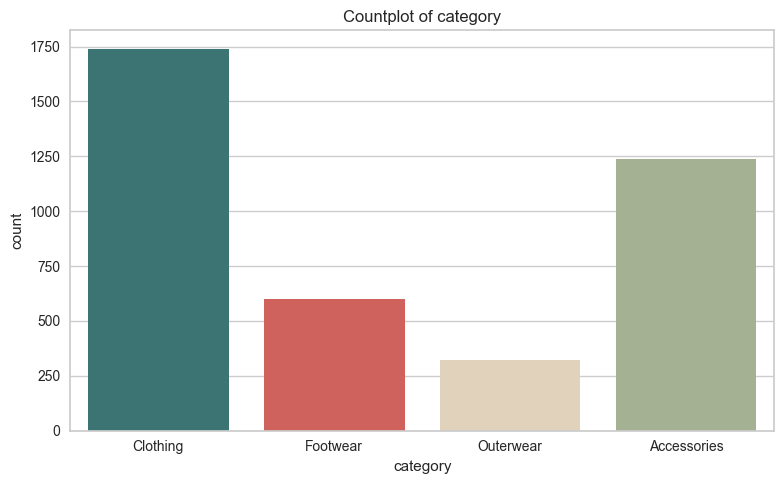

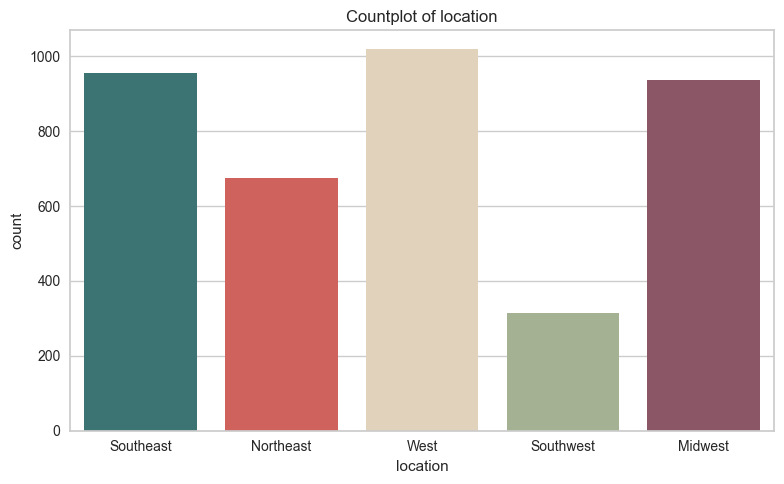

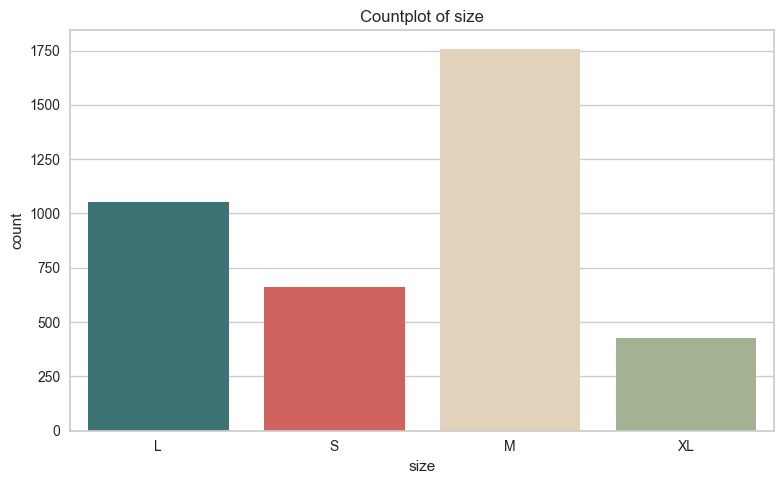

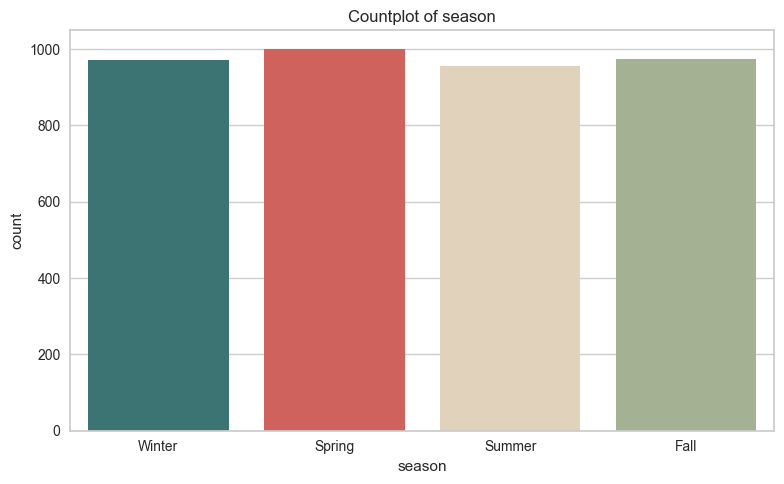

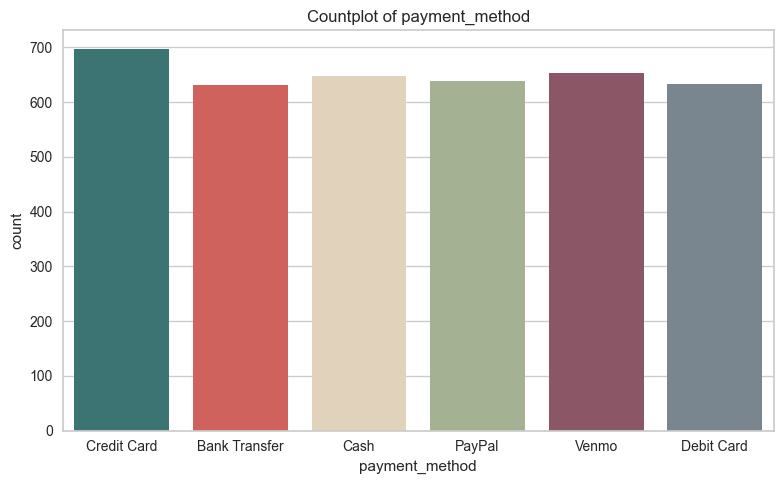

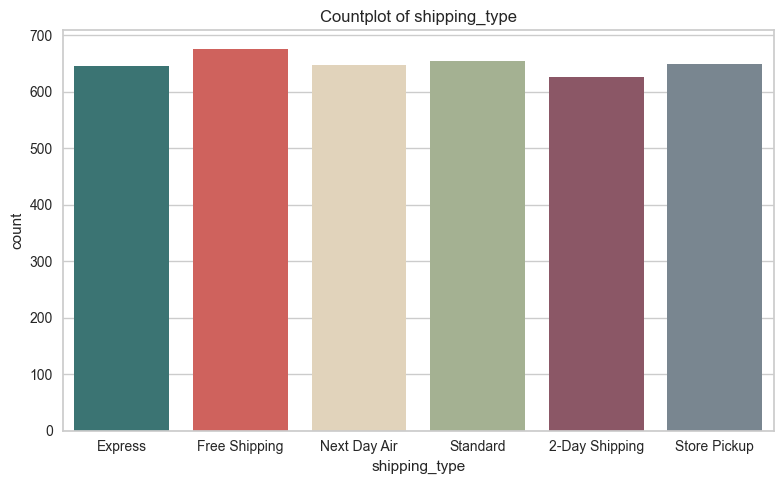

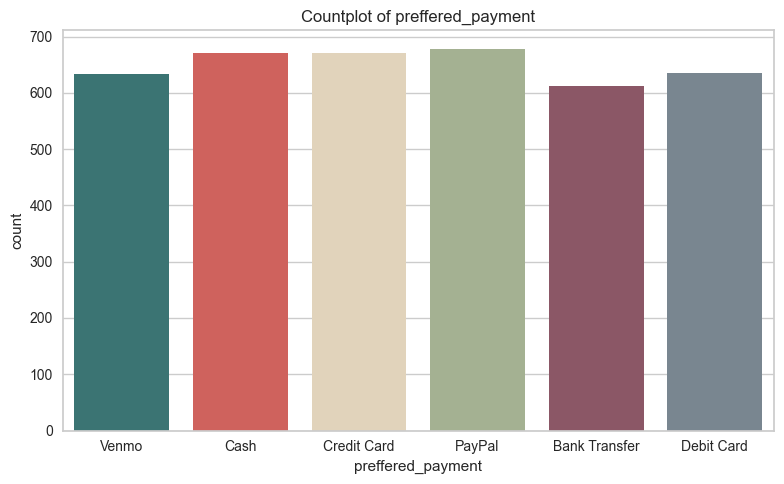

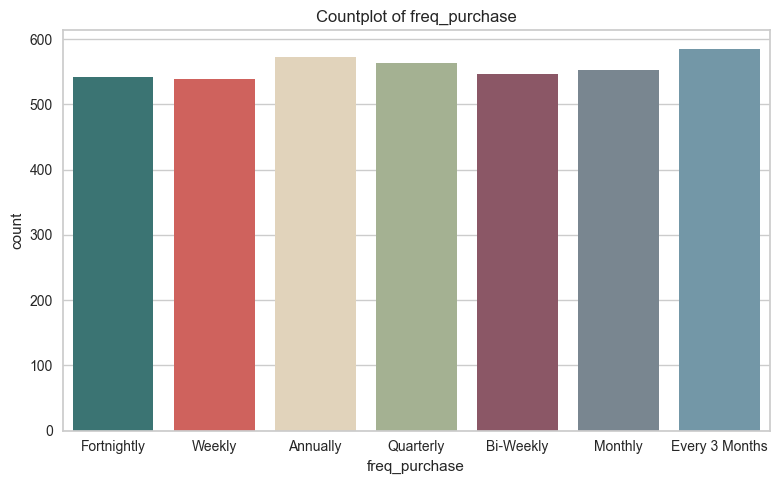

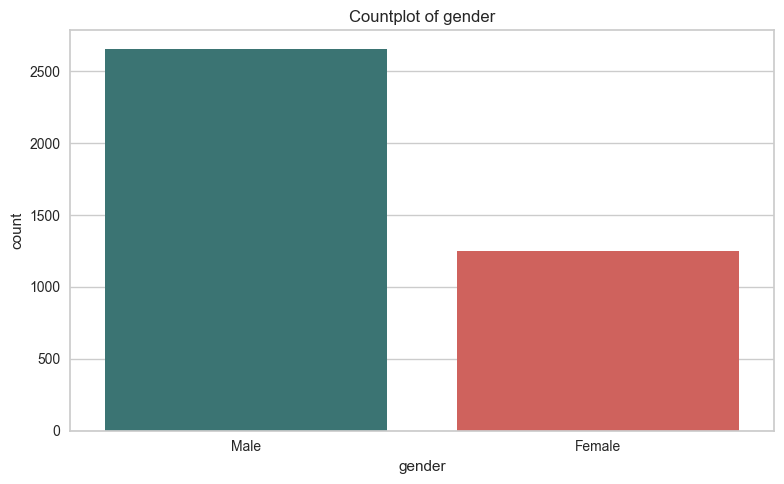

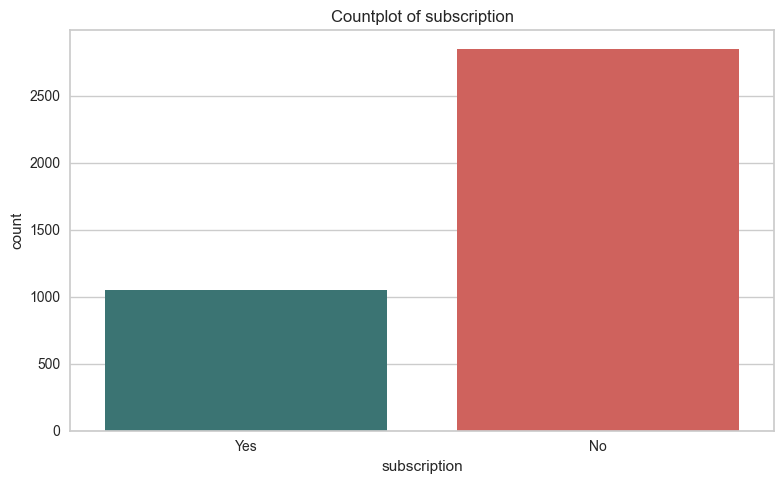

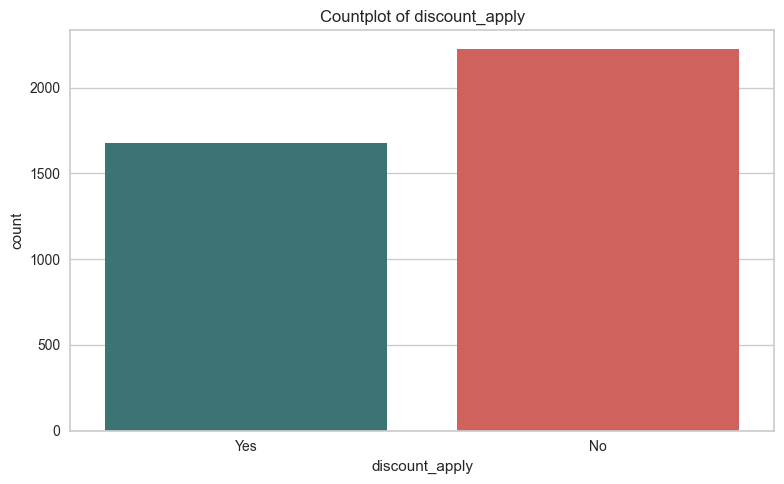

In [21]:
# Define the color palette
custom_palette = ['#327D7C', '#E2504A', '#E7D4B5', '#A5B68D', '#944E63', '#758694', '#6A9AB0']

# Plot countplots for each categorical column and binary column
for column in categorical_column + binary_column:
    
    plt.figure(figsize=(8, 5))
    sns.countplot(data=shop_df, x=column, palette=custom_palette)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

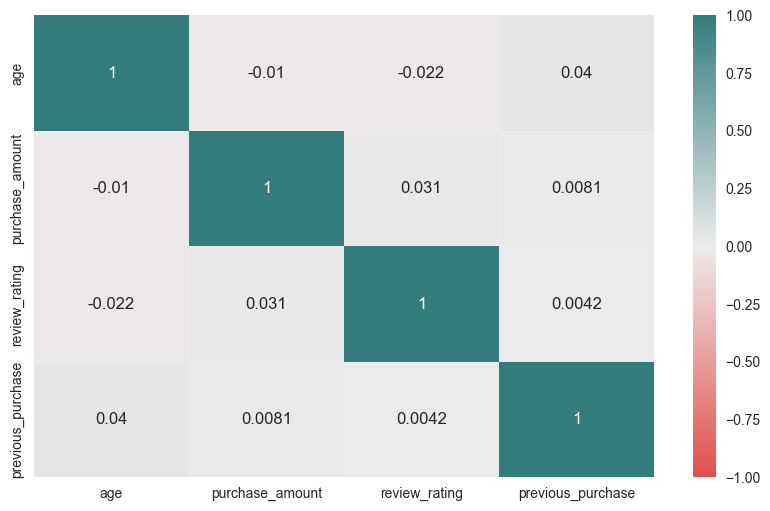

In [22]:
# Define the custom colormap
colors = ["#E2504A", "#EDEBEC", "#327D7C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= shop_df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

Insight:
- `location` and `payment_method` are standardized into more specific categories.
Unnecessary features are removed to simplify the dataset.
- `purchase_amount` is quite diverse, with the majority of purchases occurring in the mid-range. There are some purchases with quite large values.
- `age` & `previous_purchase` show a fairly uniform distribution, so that customer age influences previous purchases.
- The majority of customers make more purchases on clothing products, compared to outerwear which is the least in demand.
- The distribution of customers is mostly in the western region.
- The payment method is dominated by the use of cards and digital wallets.
- Customers make purchases more often every 3 months.
- Customer demographics are dominated by men and are not subscriptions and do not apply discounts.
- `age`  does not have a significant relationship with the `purchase_amount` or `previous_purchase`. Customers who often make large purchases tend to continue to make large purchases in the future.

### 5. Data Preprocessing

#### Encoding categorial variable

In [23]:
# Define categorical columns to be one-hot encoded
categorical_cols = shop_df.select_dtypes(include=['object']).columns 

encoder = LabelEncoder()
x_encoder = pd.DataFrame(shop_df)
 
for cols in categorical_cols:
    x_encoder[cols] = encoder.fit_transform(shop_df[cols])

#### Scaling

In [24]:
# Instantiate Scaler
standard_scaler = StandardScaler()

# fit_transform
x_scaled = standard_scaler.fit_transform(x_encoder)

### 6. Clustering

#### K-Means Clustering

In [25]:
num_cluster = 2
kmeans = KMeans(n_clusters=num_cluster, random_state=50)

# Fit the KMeans algorithm
kmeans.fit(x_scaled)

# Predict the cluster labels 
y_kmeans = kmeans.fit_predict(x_scaled)

In [26]:
x_transformed = standard_scaler.inverse_transform(x_scaled)
pd.DataFrame(x_transformed, columns=x_encoder.columns).head()

,age,gender,category,purchase_amount,location,size,season,review_rating,subscription,payment_method,shipping_type,discount_apply,previous_purchase,preffered_payment,freq_purchase
0,55.0,1.0,1.0,53.0,2.0,0.0,3.0,3.1,1.0,2.0,1.0,1.0,14.0,5.0,3.0
1,19.0,1.0,1.0,64.0,1.0,0.0,3.0,3.1,1.0,0.0,1.0,1.0,2.0,1.0,3.0
2,50.0,1.0,1.0,73.0,1.0,2.0,1.0,3.1,1.0,1.0,2.0,1.0,23.0,2.0,6.0
3,21.0,1.0,2.0,90.0,1.0,1.0,1.0,3.5,1.0,4.0,3.0,1.0,49.0,4.0,6.0
4,45.0,1.0,1.0,49.0,4.0,1.0,1.0,2.7,1.0,1.0,2.0,1.0,31.0,4.0,0.0


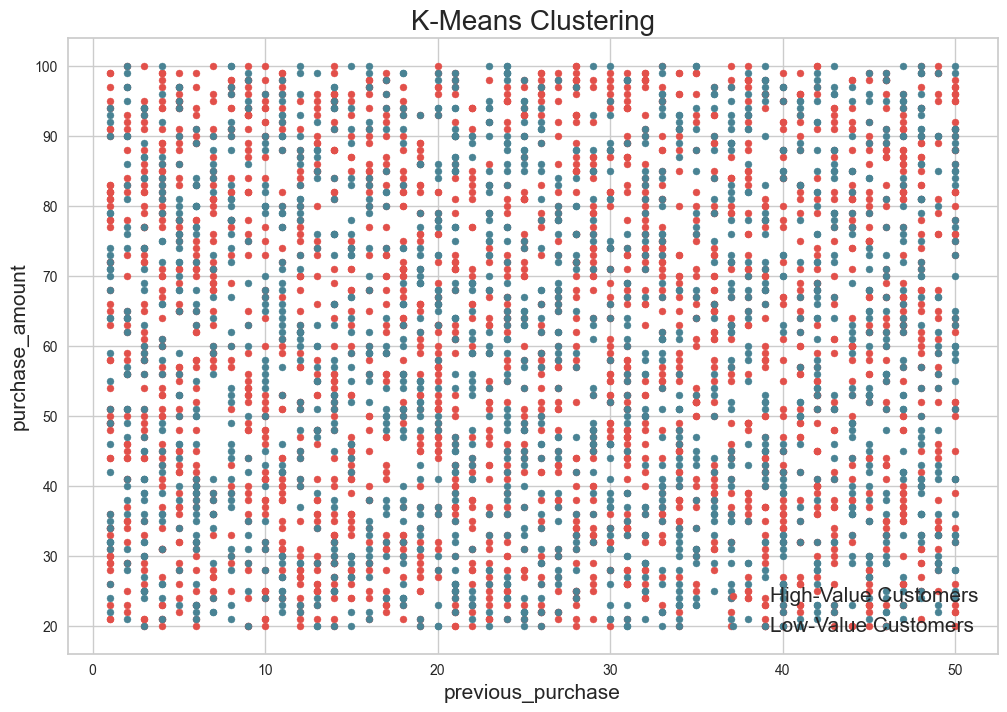

In [27]:
# Visualising the clusters
plt.figure(figsize= (12,8))

plt.scatter(x_transformed[y_kmeans == 0, 12], x_transformed[y_kmeans == 0, 3], s = 25, c = '#E2504A', label = 'High-Value Customers')
plt.scatter(x_transformed[y_kmeans == 1, 12], x_transformed[y_kmeans == 1, 3], s = 25, c = '#498394', label = 'Low-Value Customers')
plt.title('K-Means Clustering',fontsize = 20)
plt.xlabel('previous_purchase',fontsize = 15)
plt.ylabel('purchase_amount',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

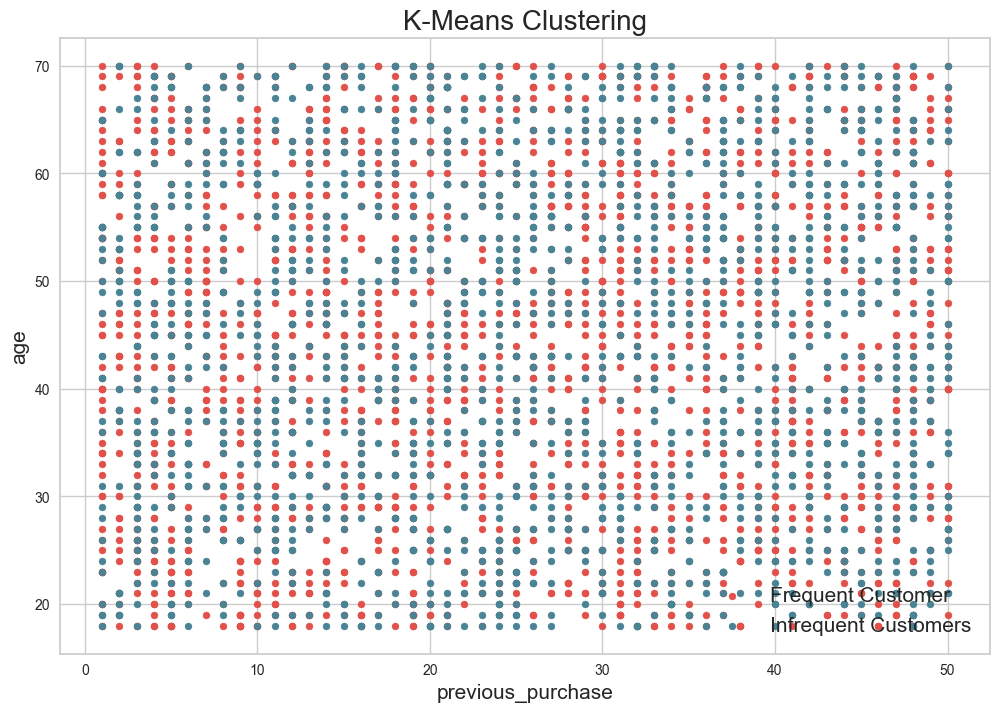

In [28]:
# Visualising the clusters
plt.figure(figsize= (12,8))

plt.scatter(x_transformed[y_kmeans == 0, 12], x_transformed[y_kmeans == 0, 0], s = 25, c = '#E2504A', label = 'Frequent Customer')
plt.scatter(x_transformed[y_kmeans == 1, 12], x_transformed[y_kmeans == 1, 0], s = 25, c = '#498394', label = 'Infrequent Customers')
plt.title('K-Means Clustering',fontsize = 20)
plt.xlabel('previous_purchase',fontsize = 15)
plt.ylabel('age',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

#### Clustering Method Evaluation

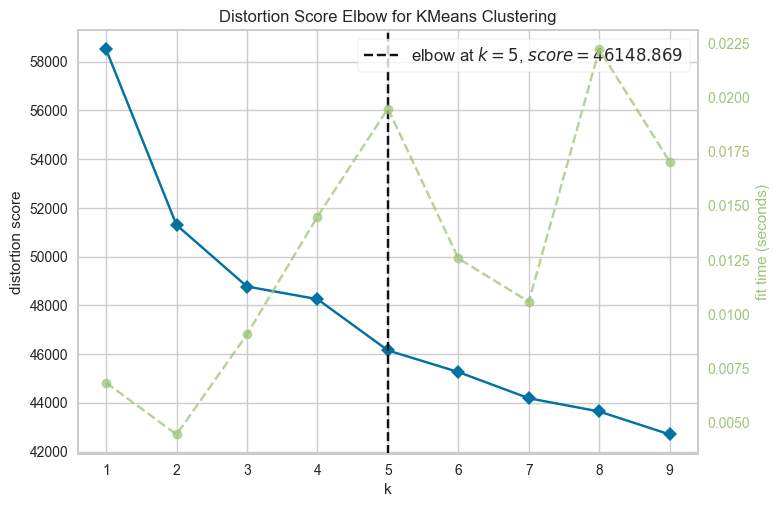

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(x_scaled)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [30]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(x_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.12202724071198945
For n_clusters=3, the silhouette score is 0.07786944683888612
For n_clusters=4, the silhouette score is 0.08497472706021532
For n_clusters=5, the silhouette score is 0.07017865572573782
For n_clusters=6, the silhouette score is 0.05742112722977354
For n_clusters=7, the silhouette score is 0.05643578155164524
For n_clusters=8, the silhouette score is 0.053425857380370666
For n_clusters=9, the silhouette score is 0.05425721816404705
For n_clusters=10, the silhouette score is 0.055923098653996195


#### Feature Selection

In [31]:
# ------------------- Filter Methods -------------------

filter_selector = SelectKBest(score_func=chi2, k=5)
X_train_filter = filter_selector.fit_transform(x_encoder, y_kmeans)
 
print('Features selection by Filter Methods:', filter_selector.get_support(indices=True))

Features selection by Filter Methods: [ 1  3  8 11 12]


In [32]:
# RFE (Recursive Feature Elimination)
model = LogisticRegression(solver='lbfgs', max_iter=5000)
rfe_selector = RFE(model, n_features_to_select=5)
X_train_rfe = rfe_selector.fit_transform(x_encoder, y_kmeans)
 
print('Features selection by Wrapper Methods:', rfe_selector.get_support(indices=True))

Features selection by Wrapper Methods: [ 1  6  7  8 11]


In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_scaled, y_kmeans)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

rf_threshold = 0.05
important_features_indices = [i for i in range(len(importances)) if importances[i] >= rf_threshold]

X_important = x_scaled[:, important_features_indices]

print('Features selection by Embedded Methods (above threshold):')
for i in important_features_indices:
    print(f'{x_encoder.columns[i]}: {importances[i]}')

Features selection by Embedded Methods (above threshold):
gender: 0.10990433977560167
subscription: 0.20765357568212697
discount_apply: 0.6336611882874867


In [34]:
# Create Random Forest Classifier for RFE
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create RFE object
rfe = RFE(estimator=rf, n_features_to_select=5)

# Fit RFE (using correct labels)
rfe.fit(x_scaled, np.random.randint(0, 3, size=x_scaled.shape[0]))

# Get selected features by RFE
selected_features_rfe = x_encoder.columns[rfe.support_].tolist()
print("Features selected by RFE:", selected_features_rfe)

Features selected by RFE: ['age', 'purchase_amount', 'review_rating', 'previous_purchase', 'freq_purchase']


In [35]:
select_features = ['gender', 'purchase_amount', 'subscription', 'discount_apply', 'previous_purchase']
categorical_select = ['gender', 'subscription', 'discount_apply']
le_dict = {}
for col in categorical_select:
    le = LabelEncoder()
    shop_df[col] = le.fit_transform(shop_df[col])
    le_dict[col] = le

In [36]:
numerical_select = ['purchase_amount', 'previous_purchase']
scaler = StandardScaler()
shop_df[numerical_select] = scaler.fit_transform(shop_df[numerical_select])
X = shop_df[select_features]

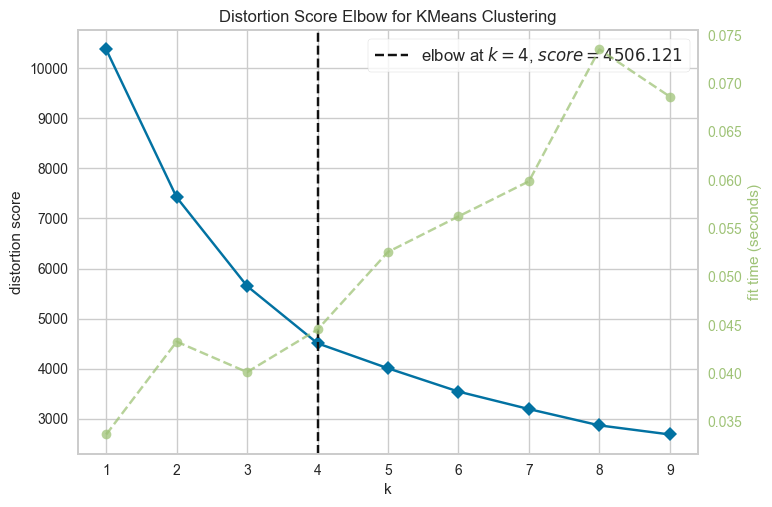

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
temp_kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(temp_kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [38]:
# Initialize the KMeans algorithm with chosen k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, max_iter=50, random_state=101, n_init=10)

# Fit the KMeans algorithm
kmeans.fit(X)

KMeans(max_iter=50, n_clusters=4, n_init=10, random_state=101)

##### Cluster Visualization

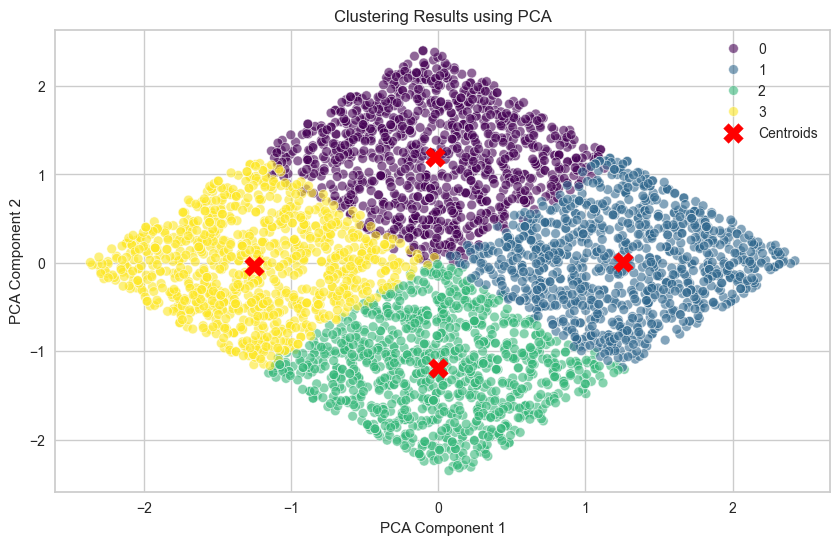

Centroid Values:
  gender  purchase_amount subscription discount_apply  previous_purchase
0   Male        80.088469           No             No          13.214712
1   Male        80.299270           No             No          38.504692
2   Male        39.200605           No             No          37.130040
3   Male        38.831389           No             No          12.532344


In [39]:
shop_df['cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=shop_df['cluster'], palette='viridis', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clustering Results using PCA")
plt.legend()
plt.show()

# Convert centroids back to original values
df_centroids = pd.DataFrame(centroids, columns=select_features)
df_centroids[numerical_select] = scaler.inverse_transform(df_centroids[numerical_select])
for col in categorical_select:
    df_centroids[col] = df_centroids[col].round().astype(int).map(lambda x: le_dict[col].inverse_transform([x])[0])

print("Centroid Values:")
print(df_centroids)

In [40]:
# Inverse transform numerical features back to original scale
shop_df[numerical_select] = scaler.inverse_transform(shop_df[numerical_select])
# Decode categorical features back to original labels (optional)
for col, le in le_dict.items():
    shop_df[col] = le.inverse_transform(shop_df[col])
shop_cluster = shop_df.copy()

shop_cluster.head()

,age,gender,category,purchase_amount,location,size,season,review_rating,subscription,payment_method,shipping_type,discount_apply,previous_purchase,preffered_payment,freq_purchase,cluster
0,55,Male,Clothing,53.0,Southeast,L,Winter,3.1,Yes,Credit Card,Express,Yes,14.0,Venmo,Fortnightly,3
1,19,Male,Clothing,64.0,Northeast,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,2.0,Cash,Fortnightly,0
2,50,Male,Clothing,73.0,Northeast,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,23.0,Credit Card,Weekly,0
3,21,Male,Footwear,90.0,Northeast,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49.0,PayPal,Weekly,1
4,45,Male,Clothing,49.0,West,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,31.0,PayPal,Annually,2


##### Cluster Results Analysis and Interpretation

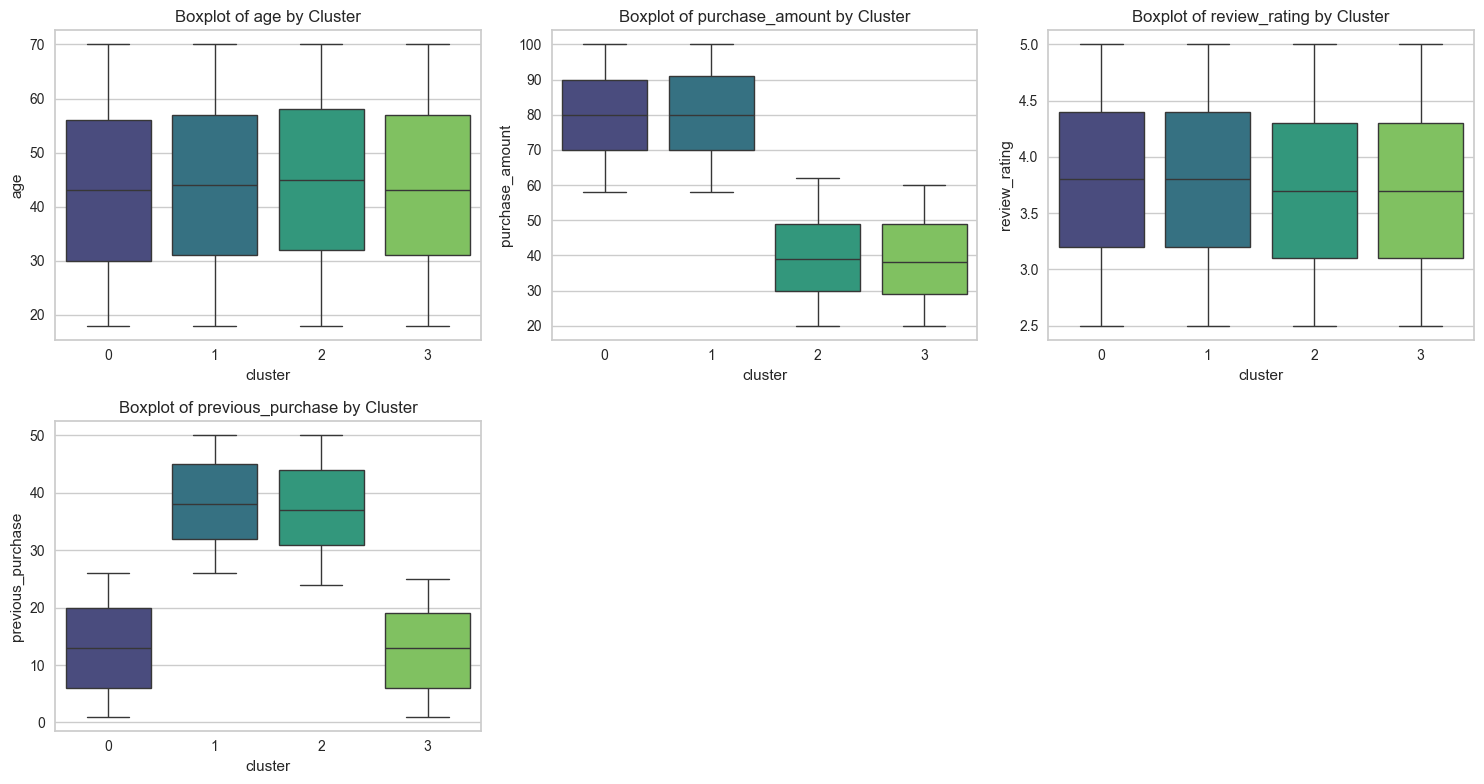

In [41]:
numerical = ['age', 'purchase_amount', 'review_rating', 'previous_purchase']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=shop_df['cluster'], y=shop_df[col], palette='viridis')
    plt.title(f'Boxplot of {col} by Cluster')
plt.tight_layout()
plt.show()

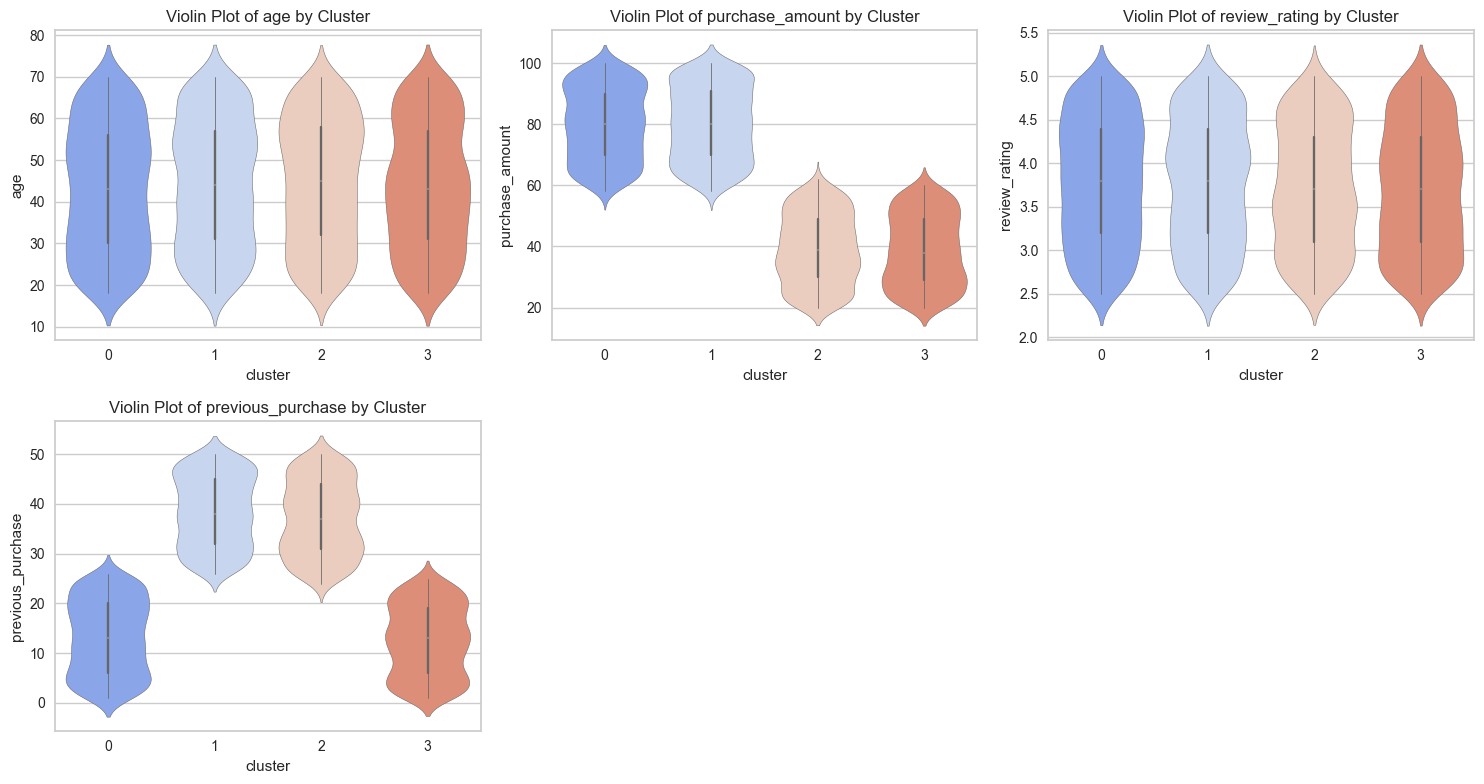

In [42]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=shop_cluster['cluster'], y=shop_cluster[col], palette='coolwarm')
    plt.title(f'Violin Plot of {col} by Cluster')
plt.tight_layout()
plt.show()

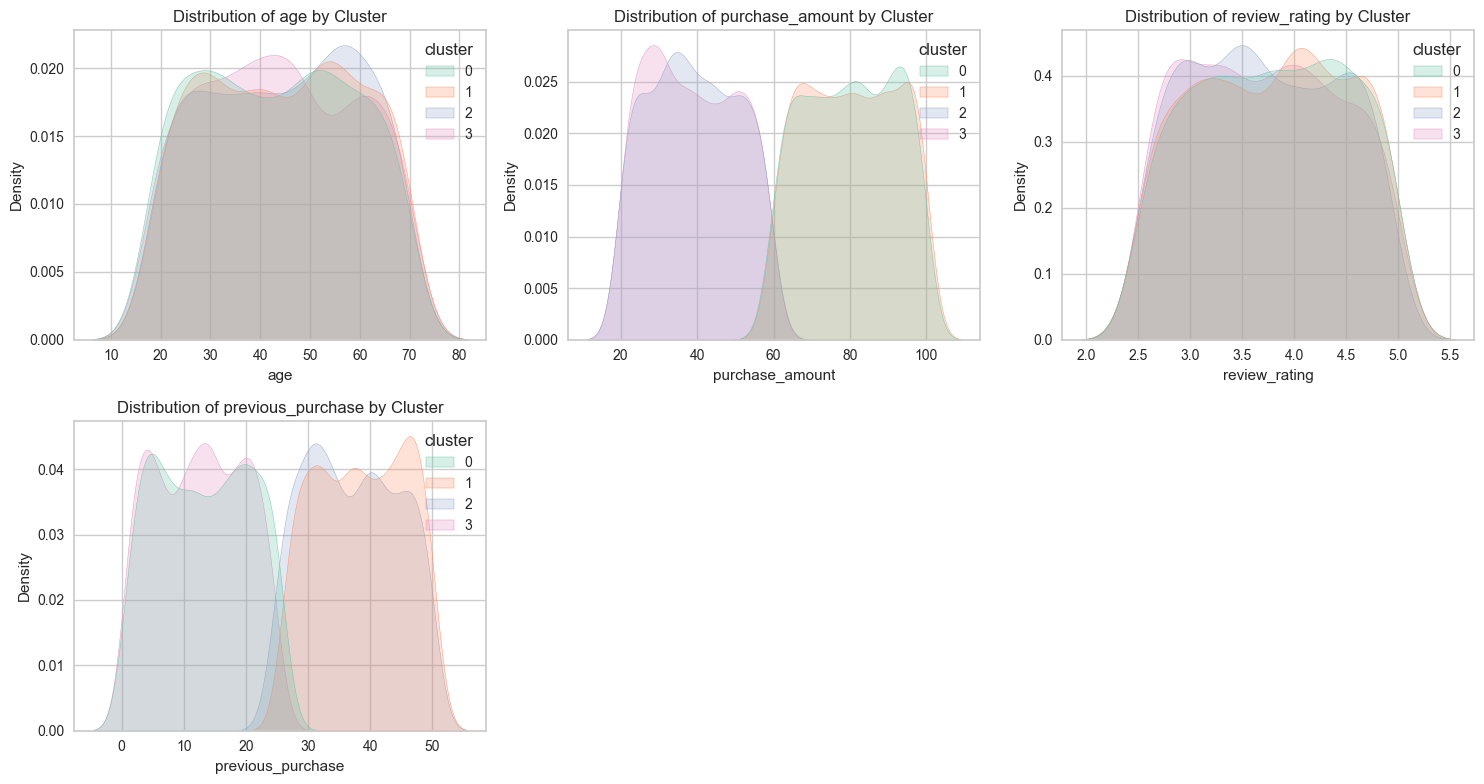

In [43]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=shop_df, x=col, hue='cluster', fill=True, common_norm=False, palette='Set2')
    plt.title(f'Distribution of {col} by Cluster')
plt.tight_layout()
plt.show()

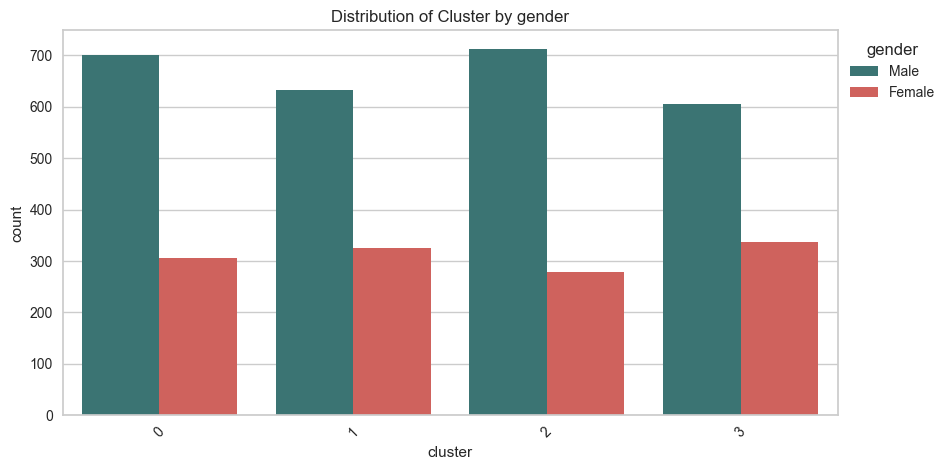

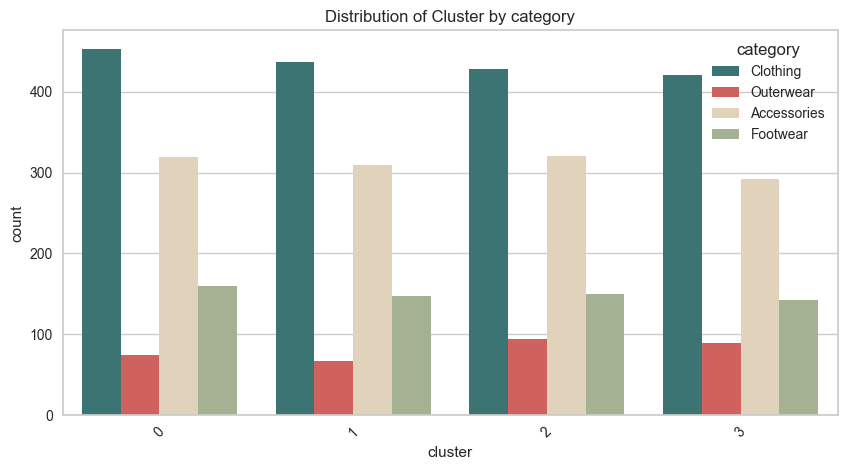

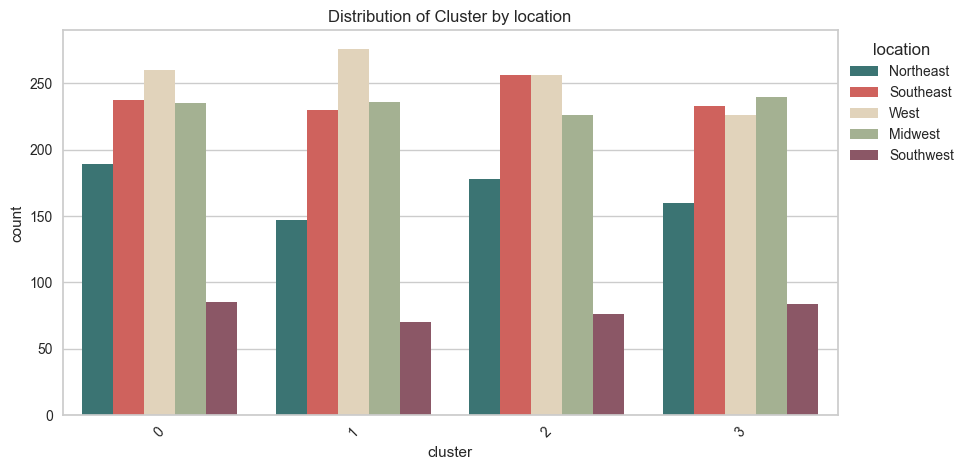

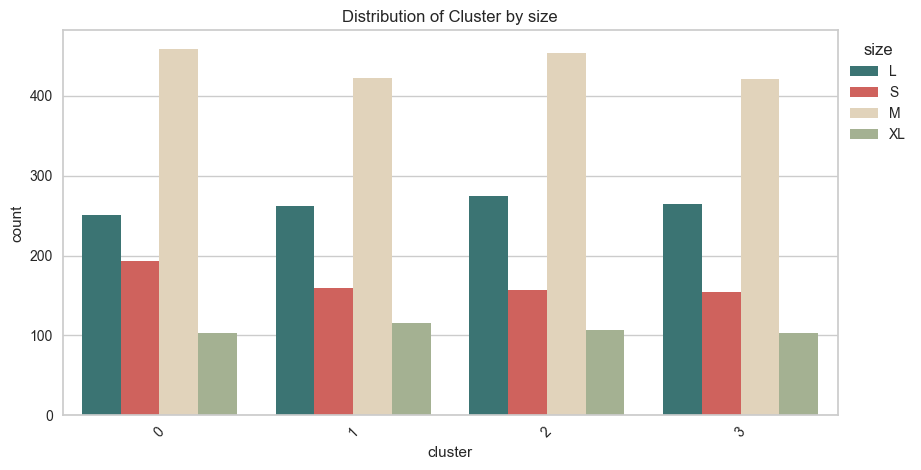

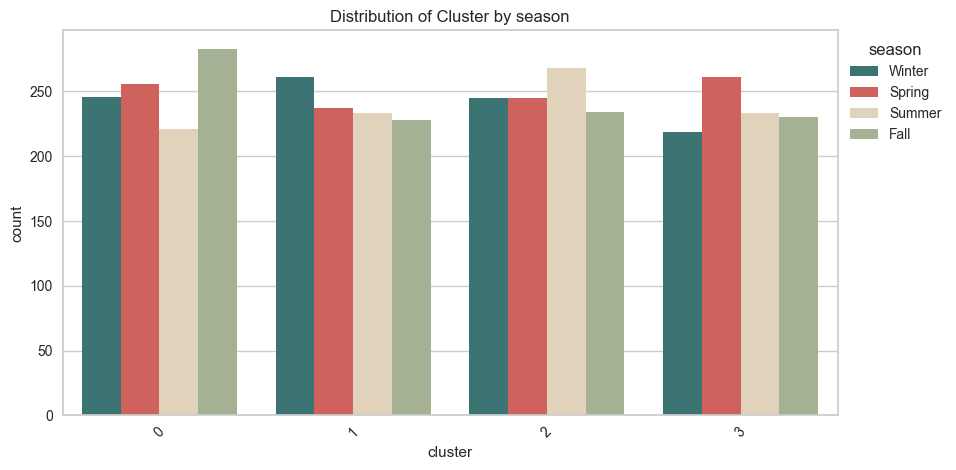

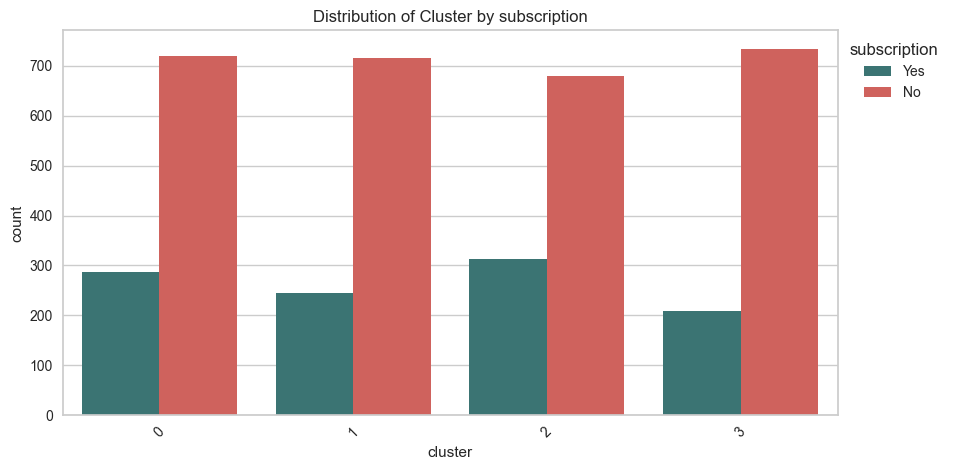

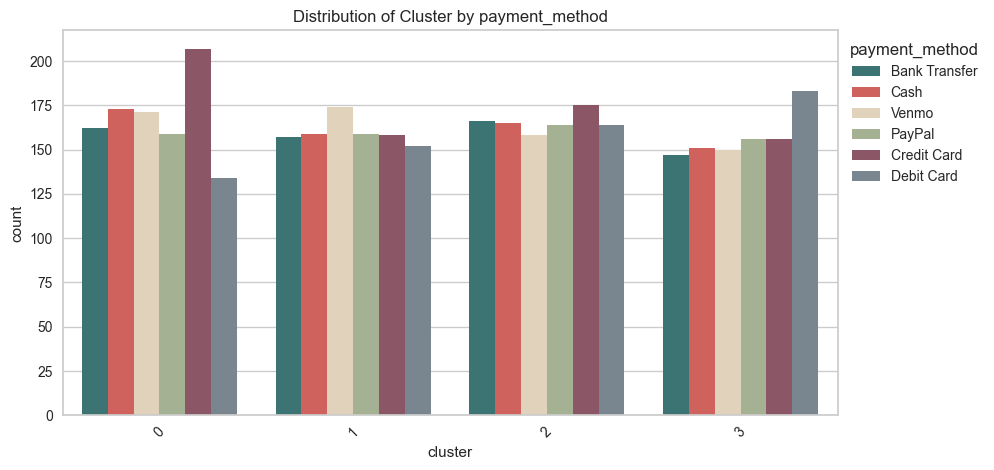

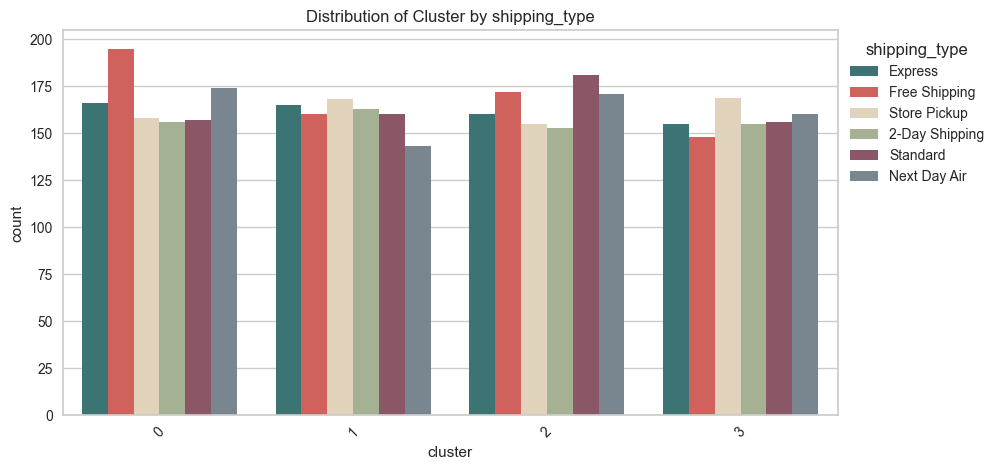

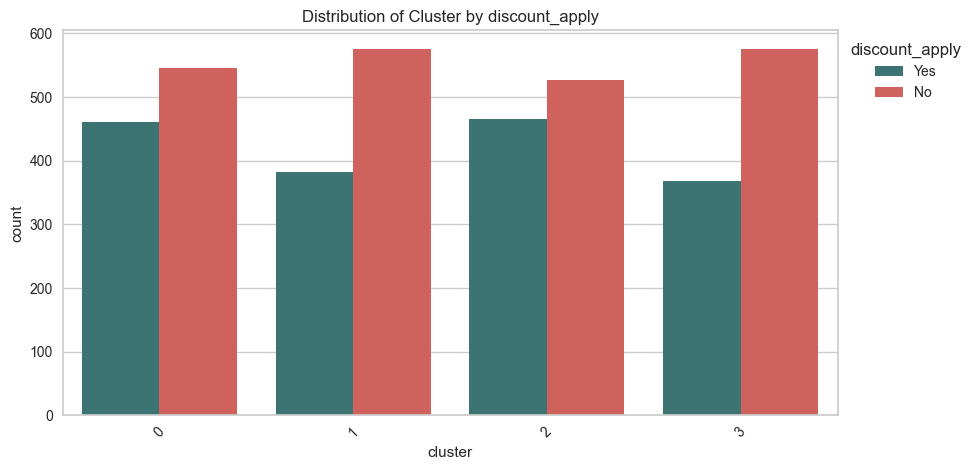

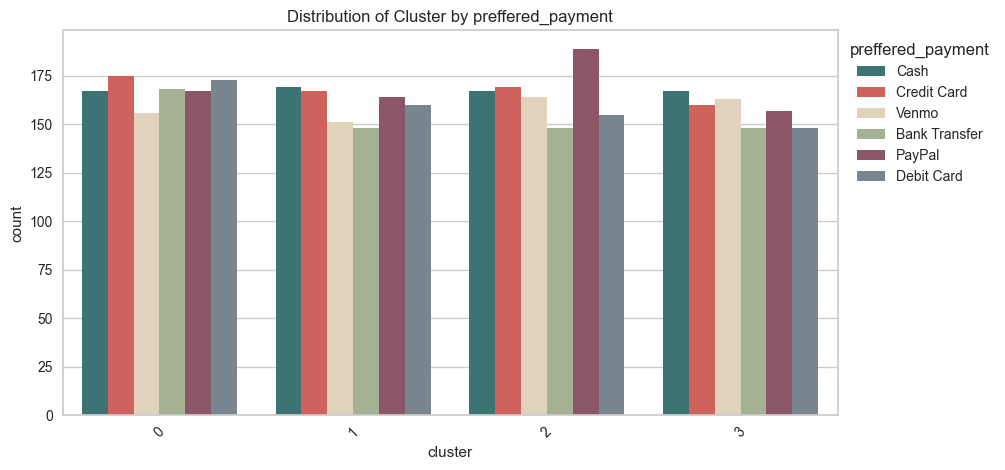

In [44]:
categorical = ['gender', 'category', 'location', 'size', 'season', 'subscription', 'payment_method', 'shipping_type', 'discount_apply', 'preffered_payment']

for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=shop_df, x='cluster', hue=col, palette=custom_palette)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of Cluster by {col}')
    plt.legend(title=col, bbox_to_anchor=(1, 1))
    plt.show()

- 📌 Cluster 0
    - Gender: Male
    - Average Purchase Amount: $80.09
    - Subscription: No
    - Discount Applied: No
    - Previous Purchases: 13.21
    - Analysis: This cluster consists of moderate spenders with medium purchase activity. They make purchases but are not heavily engaged in loyalty programs or discounts.
    - Business Implications:
        - Target with mid-range products and promotional incentives.
        - Encourage loyalty program adoption to increase retention.
- 📌 Cluster 1
    - Gender: Male
    - Average Purchase Amount: $80.30
    - Subscription: No
    - Discount Applied: No
    - Previous Purchases: 38.50
    - Analysis: This cluster represents high-value customers with consistent purchase activity. They are premium buyers who tend to make frequent purchases.
    - Business Implications:
        - Offer exclusive products or early access deals to retain loyalty.
        - Introduce bundling or premium memberships to increase lifetime value.
- 📌 Cluster 2
    - Gender: Male
    - Average Purchase Amount: $39.20
    - Subscription: No
    - Discount Applied: No
    - Previous Purchases: 37.13
    - Analysis: These customers exhibit low spending behavior but have high previous purchase activity. They may prefer affordable products and be selective shoppers.
    - Business Implications:
        - Offer targeted discounts or product recommendations to boost spending.
        - Introduce subscription incentives for long-term engagement.
- 📌 Cluster 3
    - Gender: Male
    - Average Purchase Amount: $38.83
    - Subscription: No
    - Discount Applied: No
    - Previous Purchases: 12.53
    - Analysis: This group consists of low spenders with infrequent purchases. They are price-sensitive and cautious buyers who might need stronger incentives to engage.
    - Business Implications:
        - Implement special promotions or cashback offers to drive conversion.
        - Implement special promotions or cashback offers to drive conversion.

### 8. Export Data

In [45]:
shop_df.head()

,age,gender,category,purchase_amount,location,size,season,review_rating,subscription,payment_method,shipping_type,discount_apply,previous_purchase,preffered_payment,freq_purchase,cluster
0,55,Male,Clothing,53.0,Southeast,L,Winter,3.1,Yes,Credit Card,Express,Yes,14.0,Venmo,Fortnightly,3
1,19,Male,Clothing,64.0,Northeast,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,2.0,Cash,Fortnightly,0
2,50,Male,Clothing,73.0,Northeast,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,23.0,Credit Card,Weekly,0
3,21,Male,Footwear,90.0,Northeast,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49.0,PayPal,Weekly,1
4,45,Male,Clothing,49.0,West,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,31.0,PayPal,Annually,2


In [46]:
shop_df.to_csv('shopping_trends_labeled.csv', index=False)